#PNL - Part. 1

###Aula 1 - Dados Textuais: Classificação e exploração

In [ ]:
#!wget "storage.googleapis.com/kaggle-data-sets/51413%2F95829%2Fcompressed%2Fimdb-reviews-pt-br.csv.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592003758&Signature=C%2BvG6pWHNPLA05Mje63jqUAsI4EQ%2Fp9M3aBdT0hA16wL4BNV%2FVRskEdtaIEJ5mRMkSKpa35hseUbQ0axUAPM%2BgaocDKMq9lpq3MguzQHrd1hfYy8ymF%2BYZSfPW%2BxLraENGwICybzMq4rPUFSiIcx6i2%2Fe0Fi%2FfG%2FKuTpvX0KHWn%2FLZYY4Yj57blXkFz6%2FtduxHnK9QVp1Td9fmQta%2FCJms71kMVtPoQ9BYD7m5Fe%2BOSnF30BAxofsmTZZ7jwg26QxX%2BkA7uqrhxhluKHtvP%2FJgqUo4gH3mLWgfQ5QwDH4Bz%2FIhLTd3huAdJtpDGTZGb632XDp7%2FXcx%2BIbEKzSwOeMw%3D%3D"
!mv '51413%2F95829%2Fcompressed%2Fimdb-reviews-pt-br.csv.zip?GoogleAccessId=gcp-kaggle-com@kaggle-161607.iam.gserviceaccount.com&Expires=1592003758&Signature=C+vG6pWHNPLA05Mje63jqUAsI4EQ%2Fp9M3aBdT0hA16wL4BNV%2FVRskEdtaIEJ5mRMkSKpa35hseUbQ0a' imdb-resenhas-pt-br.zip
!unzip imdb-resenhas-pt-br.zip

Archive:  imdb-resenhas-pt-br.zip
  inflating: imdb-reviews-pt-br.csv  


In [ ]:
import pandas as pd

resenha = pd.read_csv('imdb-reviews-pt-br.csv')
print(resenha.shape)
resenha.head()

(49459, 4)


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
resenha.sentiment.value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

In [ ]:
#Primeira forma de substituição (mantem a coluna original intacta)
swap = {'neg' : 0, 'pos' : 1}
resenha['avaliacao'] = resenha.sentiment.map(swap)
resenha

#Segunda forma de substituição (troca os valores na coluna original)
#resenha = resenha.replace(['neg', 'pos'], [0,1])

,id,text_en,text_pt,sentiment,avaliacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


###Aula 2 - Bag of words: criando representações de linguagem humana

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Assisti um filme bom', 'Assisti um filme ruim']

vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(texto)
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [ ]:
data = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
data

,Assisti,bom,filme,ruim,um
0,1,1,1,0,1
1,1,0,1,1,1


In [ ]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)
print(bag_of_words.shape)

(49459, 50)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(resenha.text_pt)

x = bag_of_words
y = resenha.avaliacao

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42)

regressao_log = LogisticRegression(solver='lbfgs')
regressao_log.fit(x_treino, y_treino)
acuracia = regressao_log.score(x_teste, y_teste)
print(acuracia)

0.6583097452486858


In [ ]:
def classifier_text(data, column_text, column_cassifier):

        vetorizar = CountVectorizer(lowercase=False, max_features=50)
        bag_of_words = vetorizar.fit_transform(data[column_text])

        x = bag_of_words
        y = data[column_cassifier]

        x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=42)

        regressao_log = LogisticRegression(solver='lbfgs')
        regressao_log.fit(x_treino, y_treino)
        acuracia = regressao_log.score(x_teste, y_teste)
        print(acuracia)

###Aula 3 - Visualizando os dados com WordCloud

In [ ]:
!pip install wordcloud

In [ ]:
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def img_nuvem_palavra(texto, col_texto, pos_ou_neg, col_pos_ou_neg):
    q = f"{col_pos_ou_neg} == '{pos_ou_neg}'"

    texto.query(q)
    todas_palavras = ' '.join([word for word in texto[col_texto]])
    nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

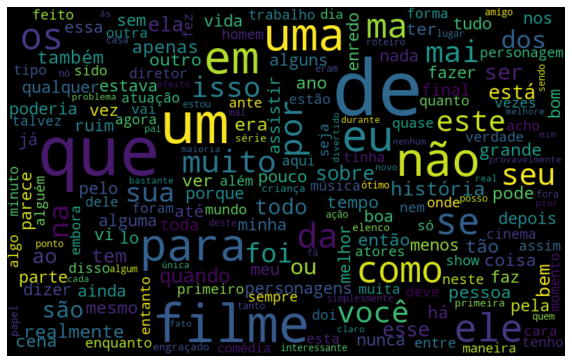

In [ ]:
sent_pos = img_nuvem_palavra(resenha, 'text_pt', 'pos', 'sentiment')
sent_pos

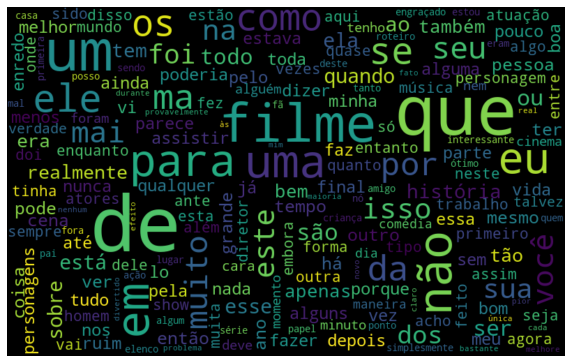

In [ ]:
sent_neg = img_nuvem_palavra(resenha, 'text_pt', 'neg', 'sentiment')
sent_neg

### Aula 4 - Tokenização e a biblioteca NLTK

In [ ]:
todas_palavras = ' '.join([word for word in resenha["text_pt"]])

In [ ]:
import nltk
from nltk import tokenize

token_espaco = tokenize.WhitespaceTokenizer()
todas_palavras = ' '.join([word for word in resenha["text_pt"]])
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [ ]:
df_palavras = pd.DataFrame({"palavras" : list(frequencia.keys()), "frequencia" : list(frequencia.values())})
df_palavras.nlargest(columns='frequencia', n = 10)

,palavras,frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


### Aula 5 - Uma nova visualização e os stop words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# stop words

palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

frase_processada = list()

for op in resenha.text_pt:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(op)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha['frase_processada'] = frase_processada

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,avaliacao,frase_processada
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


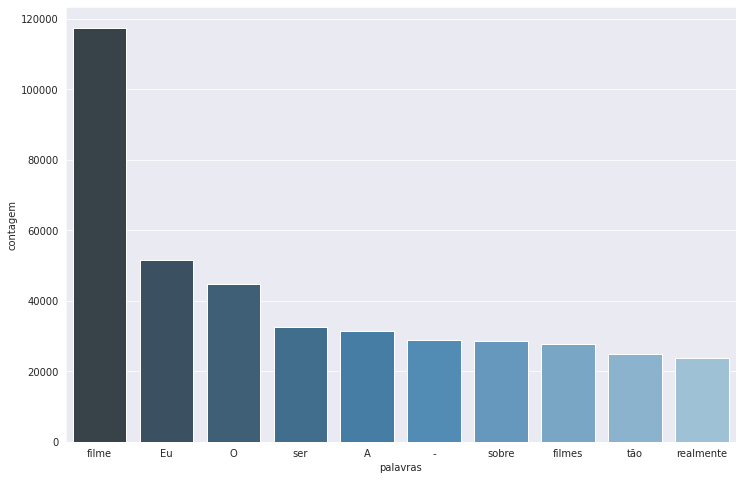

In [ ]:
import seaborn as sns

def f_pareto(df, coluna_texto, quant):
    sns.set_style('darkgrid')
    todas_palavras = ' '.join([word for word in df[coluna_texto]])

    token_frase = token_espaco.tokenize(todas_palavras)
    frequencia = nltk.FreqDist(token_frase)
    df_palavras = pd.DataFrame({"palavras" : list(frequencia.keys()), "frequencia" : list(frequencia.values())})

    dados = df_palavras.nlargest(columns='frequencia', n = quant)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = dados, x = 'palavras', y = 'frequencia', palette="Blues_d")
    ax.set(ylabel='contagem')
    plt.show()

f_pareto(resenha, 'frase_processada', 10)

# PLN - Part. 2

###Separando e removendo as pontuações

In [ ]:
token_pontuacao = tokenize.WordPunctTokenizer()

In [ ]:
from string import punctuation
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

In [ ]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes
frase_processada = list()

for opiniao in resenha['frase_processada']:
    nova_frase = list()

    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha['frase_processada2'] = frase_processada

In [ ]:
resenha

,id,text_en,text_pt,sentiment,avaliacao,frase_processada,frase_processada2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...
...,...,...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1,"Como média votos baixa, fato funcionário locad...",Como média votos baixa fato funcionário locado...
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1,O enredo algumas reviravoltas infelizes inacre...,O enredo algumas reviravoltas infelizes inacre...
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1,Estou espantado forma filme maioria outros méd...,Estou espantado forma filme maioria outros méd...
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1,A Christmas Together realmente veio antes temp...,A Christmas Together realmente veio antes temp...


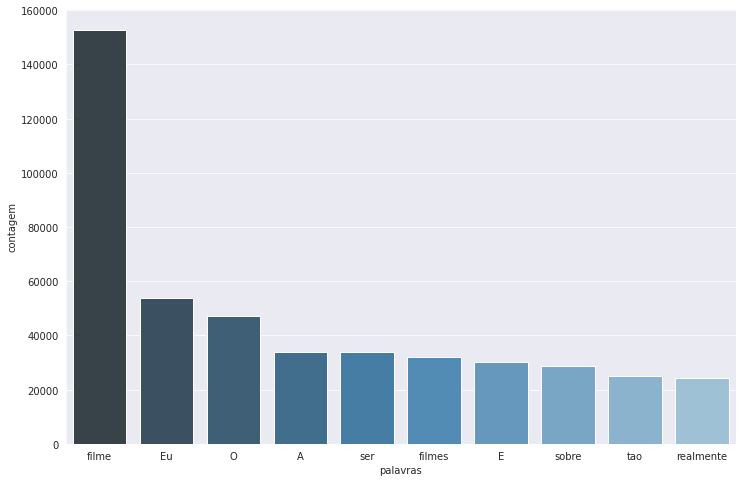

In [ ]:
f_pareto(resenha, 'frase_processada2', 10)

###Retirando os acentos e transformando as palavras para letra minúscula
Fazendo isto, o texto fica melhor padronizado e portanto, é limpeza e treinamento dos dados fica mais precisa

In [ ]:
!pip install unidecode

     |████████████████████████████████| 245kB 2.8MB/s 


In [ ]:
import unidecode

sem_acentos = [unidecode.unidecode(texto) for texto in resenha['frase_processada2']]

In [ ]:
resenha['frase_processada2'] = sem_acentos

In [ ]:
stopwords_sem_acentos = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [ ]:
frase_processada = list()

for opiniao in resenha['frase_processada2']:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acentos:
            nova_frase.append(palavra)
    
    frase_processada.append(' '.join(nova_frase))

resenha['frase_processada3'] = frase_processada

In [ ]:
resenha.head()

,id,text_en,text_pt,sentiment,avaliacao,frase_processada,frase_processada2,frase_processada3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


In [ ]:
classificacao_trat_3 = classifier_text(resenha, 'frase_processada3', 'avaliacao')
classificacao_trat_3

0.6879094217549535


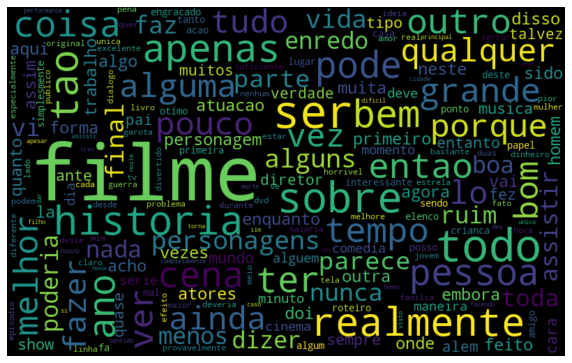

In [ ]:
sent_neg = img_nuvem_palavra(resenha, 'frase_processada3', 'neg', 'sentiment')
sent_neg

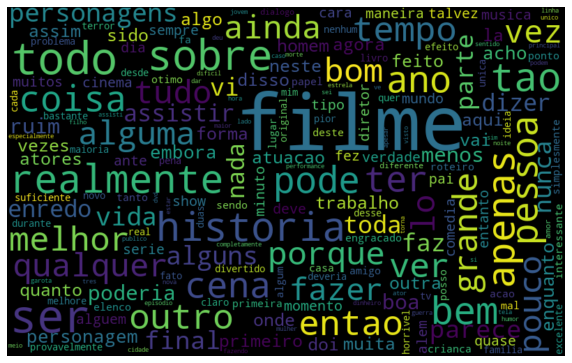

In [ ]:
sent_pos = img_nuvem_palavra(resenha, 'frase_processada3', 'pos', 'sentiment')
sent_pos

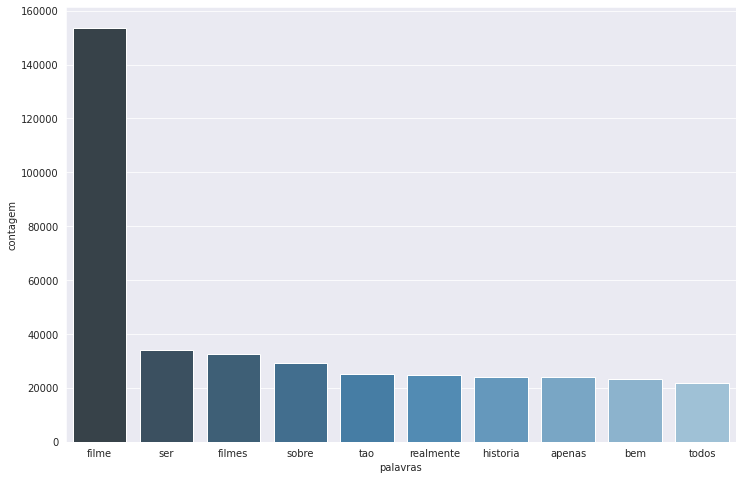

In [ ]:
f_pareto(resenha, 'frase_processada3', 10)

###Utilizando o Stemmer
O stemmer retira os sulfixos das palavras, mantendo apenas os prefixos, reduzindo a variação das palavras

In [ ]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
stemmer = nltk.RSLPStemmer()

frase_processada = list()

for opiniao in resenha['frase_processada3']:
    nova_frase = list()

    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(stemmer.stem(palavra))
    
    frase_processada.append(' '.join(nova_frase))

resenha['frase_processada3'] = frase_processada

In [ ]:
classificacao_trat_4 = classifier_text(resenha, 'frase_processada3', 'avaliacao')
classificacao_trat_4

0.6943792964011323
Anterior:  None
Atual:  None


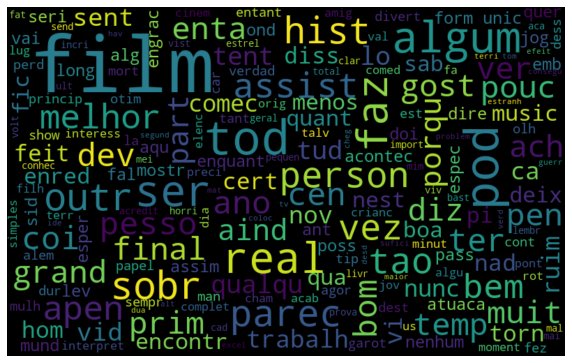

In [ ]:
sent_neg = img_nuvem_palavra(resenha, 'frase_processada3', 'neg', 'sentiment')
sent_neg

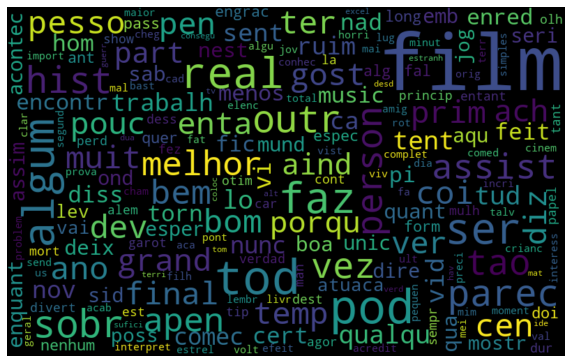

In [ ]:
sent_pos = img_nuvem_palavra(resenha, 'frase_processada3', 'pos', 'sentiment')
sent_pos

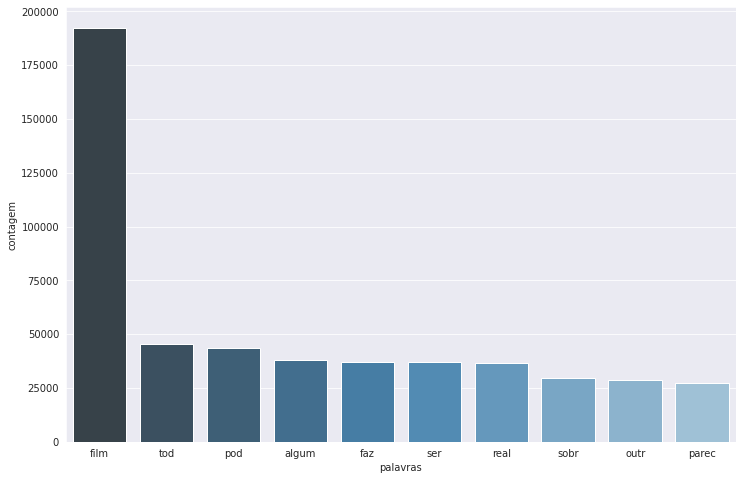

In [ ]:
f_pareto(resenha, 'frase_processada3', 10)

###Utilizando o TF-IDF
O TF-IDF coloca pesos nas palavras, atribuindo pontuações menores a palavras muito repetitivas e pontuações maiores a palavras únicas e que identificam o sentimento do texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, max_features=50)

dados_tratados = tfidf.fit_transform(resenha['frase_processada3'])
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_tratados, resenha['avaliacao'], random_state = 42)
predict = regressao_log.fit(x_treino, y_treino)
acuracia = regressao_log.score(x_teste, y_teste)
print(f"A acurácia foi de {acuracia}")

A acurácia foi de 0.6988273352203801


###Utilizando o n-grams
O n-grams faz um agrupamento de palavras construindo algumas expressões comuns de acordo com a quantidade de palavras agrupadas definida

In [ ]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))

dados_tratados2 = tfidf.fit_transform(resenha['frase_processada3'])
x_treino, x_teste, y_treino, y_teste = train_test_split(dados_tratados2, resenha['avaliacao'], random_state = 42)
predict = regressao_log.fit(x_treino, y_treino)
acuracia = regressao_log.score(x_teste, y_teste)
print(f"A acurácia foi de {acuracia}")

A acurácia foi de 0.8858875859280226


In [ ]:
pesos = pd.DataFrame(regressao_log.coef_[0].T, index=tfidf.get_feature_names())
pesos.nlargest(50,0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [ ]:
pesos.nsmallest(50,0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310
